# epitopepredict advanced analyses

### References:
* Paul, S. et al., 2015. Development and validation of a broad scheme for prediction of HLA class II restricted T cell epitopes. Journal of Immunological Methods, 422, pp.28–34. Available at: http://dx.doi.org/10.1016/j.jim.2015.03.022.
* Terry, F.E. et al., 2014. Time for T? Immunoinformatics addresses vaccine design for neglected tropical and emerging infectious diseases. Expert review of vaccines, 9, pp.1–15. Available at: http://www.ncbi.nlm.nih.gov/pubmed/25193104.


In [6]:
import numpy as np
import pandas as pd
pd.set_option('display.width', 100)
pd.set_option('max_colwidth', 80)
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
sns.set_context("notebook", font_scale=1.4)
from IPython.display import display, HTML

import epitopepredict as ep
from epitopepredict import base, sequtils, analysis

In [7]:
genbankfile = '../testing/zaire-ebolavirus.gb'
zaire = sequtils.genbank_to_dataframe(genbankfile, cds=True)
savepath = 'test_iedbmhc1'
Pi = ep.get_predictor('iedbmhc1')
alleles = ep.mhc1_supertypes
Pi.predictProteins(zaire,length=11,alleles=alleles,path=savepath,overwrite=False)
Pi.load(path=savepath)

predictions done for 9 proteins in 6 alleles
results saved to /home/farrell/gitprojects/epitopepredict/examples/test_iedbmhc1


## Binder clustering for finding regions with possible epitopes

One application of immunoinformatics is to screen out likely candidate antigens from the genome for further study. To do this using epitope prediction requires filtering the many potential binders in each protein. There is no theoretical basis for doing this.

**Epitope clustering** has been previously observed to be an indicator of T cell epitope regions. The `findClusters` method in the analysis module allows automatic cluster detection from a set of predicted binders from one or more proteins. It can be done for a whole genome.

The result is a table of sequence regions with the number of binders and density of epitope cluster.

In [8]:
#find clusters of binders in these results
pb = Pi.promiscuousBinders(cutoff=5,n=2)
cl = analysis.find_clusters(pb, dist=10, min_size=3, genome=zaire)
display(cl[:20])

40 clusters found in 7 proteins


,name,start,end,binders,clustersize,gene,peptide
0,ZEBOVgp7,1451,1481,7,30,L,FTTHFLTYPKIGLLYSFGAFVSYYLGNTIL
1,ZEBOVgp1,176,215,6,39,NP,QVHAEQGLIQYPTAWQSVGHMMVIFRLMRTNFLIKFLLI
2,ZEBOVgp7,95,118,5,23,L,CQQFLDEIIKYTMQDALFLKYYL
3,ZEBOVgp7,1962,1987,5,25,L,VFLSDTEGMLWLNDNLAPFFATGYL
4,ZEBOVgp5,224,249,4,25,VP30,ALWQQWDRQSLIMFITAFLNIALQL
5,ZEBOVgp4.2,15,35,4,20,GP,RTSFFLWVIILFQRTFSIPL
6,ZEBOVgp7,139,158,3,19,L,IQGNEFLHQMFFWYDLAIL
7,ZEBOVgp1,142,160,3,18,NP,TEANAGQFLSFASLFLPK
8,ZEBOVgp4.2,225,252,3,27,GP,GTNETEYLFEVDNLTYVQLESRFTPQF
9,ZEBOVgp3,165,186,3,21,VP40,VQLPQYFTFDLTALKLITQPL


## plot regions on sequence 
We can use this to see where our clusters are in the sequence, for exmaple

In [12]:
name = 'ZEBOVgp6'
#ep.plotting.plot_multiple([Pi], name, regions=cl, n=2)

## overlaps

/home/farrell/gitprojects/epitopepredict/epitopepredict/base.py:826: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)
/home/farrell/gitprojects/epitopepredict/epitopepredict/analysis.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[label] = df.apply(lambda r: overlap(r,found),axis=1)


predictions done for 9 proteins in 7 alleles
results saved to /home/farrell/gitprojects/epitopepredict/examples/test_netmhciipan
17 with overlapping binders
        name  start  end  binders  clustersize  gene                peptide  mhc2_ovlp
28  ZEBOVgp6    142  158        2           16  VP24       EQLSLKMLSLIRSNIL          2
29  ZEBOVgp6     86  107        2           21  VP24  IESPLWALRVILAAGIQDQLI          0
30  ZEBOVgp6     68   80        2           12  VP24           WSMTRNLFPHLF          0


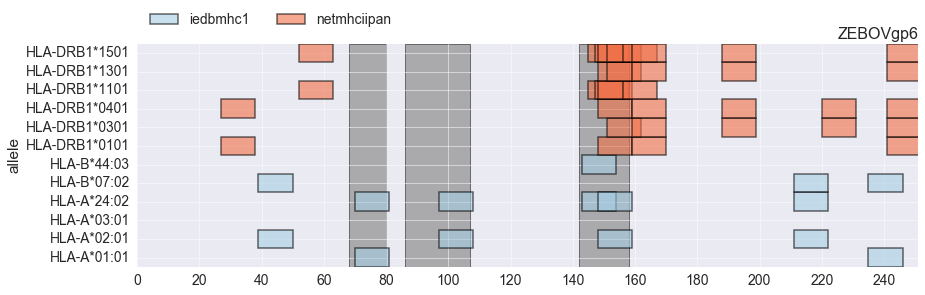

In [13]:
Pn = ep.get_predictor('netmhciipan')
savepath2='test_netmhciipan'
alleles2 = ep.mhc2_supertypes
Pn.predictProteins(zaire,length=11,alleles=alleles2,path=savepath2,overwrite=False)
Pn.load(path=savepath2)

cl = analysis.get_overlaps(cl,Pn.promiscuousBinders(n=2,cutoff=5),label='mhc2_ovlp')

#plot both sets of binders and overlay region of cluster in previous data
ax = ep.plot_tracks([Pi,Pn],name=name,legend=True,figsize=(14,4),n=2)
r = cl[cl.name==name]
print r
coords = (list(r.start),list(r.end-r.start))
coords = zip(*coords)
ep.plot_regions(coords, ax, color='gray')

## conservation analysis
Conservation of epitopes may be important across strains or species.

25 non-redundant sequences retrieved


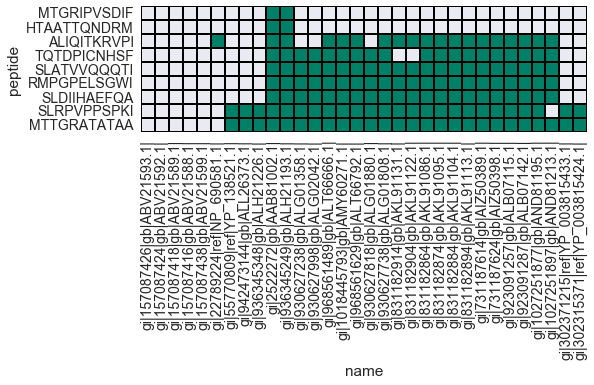

In [14]:
reload(ep.base)
reload(analysis)
reload(sequtils)

name = 'ZEBOVgp2'
proteinseq = zaire[zaire.locus_tag==name].translation.iloc[0]
#print proteinseq
#print pb
seqs = pb.peptide

#provide a list of seqs (e.g. strains)
filename='ebola_VP35.fa'
r = sequtils.fetch_protein_sequences('Filovirus[Orgn] AND VP35[Gene]', filename=filename)
#align fasta sequences
aln = sequtils.muscle_alignment(filename)
#sequtils.showAlignment(aln)
alnrows = sequtils.alignment_to_dataframe(aln)

#print (sequtils.formatAlignment(aln))
#print alnrows[:25][['accession','definition','perc_ident']]
c = analysis.epitope_conservation(seqs, alnrows=alnrows)

## use a local blast database to find orthologs and conservation of your epitopes
Blast the protein sequence locally to get an alignment with any orthologs, then perform the analysis as above. In this case we have created a blast database of viral refseq proteins locally. Online blast is generally too slow for such an analysis, especially if we want to examine epitopes in many proteins.

running blast..
7 hits, 7 filtered
          expect  identity       accession                                          definition  \
0   0.000000e+00       260  YP_003815424.1  polymerase complex protein [Tai Forest ebolavirus]   
1  8.425780e-175       254  YP_003815433.1       polymerase complex protein [Bundibugyo virus]   
3  1.446050e-155       222     YP_138521.1       polymerase complex protein [Sudan ebolavirus]   
2  5.109200e-161       219     NP_690581.1      polymerase complex protein [Reston ebolavirus]   
4  3.717640e-106       170  YP_004928136.1      polymerase complex protein [Lloviu cuevavirus]   
5   4.452270e-62       119  YP_009055223.1   polymerase complex protein [Marburg marburgvirus]   
6   2.145860e-61       118  YP_001531154.1   polymerase complex protein [Marburg marburgvirus]   

   perc_ident                                                                              seq  
0   76.470588  ISTRAAAINDPSLPIRNQCTRGPELSGWISEQLMTGKIPVHEI--FNDTEPHISSGSD---CLPRPKN

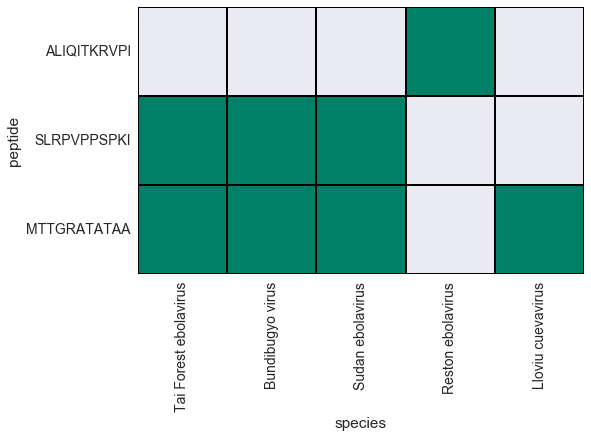

In [19]:
#localdb must be present in your file system, in the case it's in a folder called db
localdb = '../db/viral_refseq'
blr = analysis.get_orthologs(proteinseq, db=localdb)
alnrows, aln = analysis.align_blast_results(blr)
alnrows.to_csv('%s_aligned.csv' %name)
print alnrows
#now we run the same analysis using the set of refseq orthologs
c = analysis.epitope_conservation(seqs, alnrows=alnrows)